In [114]:
# load libraries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd
import numpy as np

In [115]:
# load dataset
df = pd.read_csv("combined_output_3.csv")
df.shape

(409761, 13)

In [116]:
df.head(2)

,YEAR,MONTH,DAY,MERRA-2 Temperature at 2 Meters (C),MERRA-2 Temperature at 2 Meters Range (C),MERRA-2 Temperature at 2 Meters Maximum (C),MERRA-2 Temperature at 2 Meters Minimum (C),MERRA-2 Precipitation Corrected (mm/day),MERRA-2 Relative Humidity at 2 Meters (%),MERRA-2 Specific Humidity at 2 Meters (g/kg),MERRA-2 Wind Speed at 10 Meters (m/s),Latitude,Longitude
0,1990,1,1,27.65,17.71,37.23,19.51,0.0,19.00,4.03,2.42,9.406,13.462
1,1990,1,2,27.87,17.19,37.21,20.01,0.0,19.12,3.91,1.84,9.406,13.462


##### Data Cleaning

In [117]:
# check and handle missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409761 entries, 0 to 409760
Data columns (total 13 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   YEAR                                           409761 non-null  int64  
 1   MONTH                                          409761 non-null  int64  
 2   DAY                                            409761 non-null  int64  
 3   MERRA-2 Temperature at 2 Meters (C)            409761 non-null  float64
 4   MERRA-2 Temperature at 2 Meters Range (C)      409761 non-null  float64
 5   MERRA-2 Temperature at 2 Meters Maximum (C)    409761 non-null  float64
 6    MERRA-2 Temperature at 2 Meters Minimum (C)   409761 non-null  float64
 7   MERRA-2 Precipitation Corrected (mm/day)       409761 non-null  float64
 8   MERRA-2 Relative Humidity at 2 Meters (%)      409761 non-null  float64
 9   MERRA-2 Specific Humidity at 2 Meters

In [118]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'MERRA-2 Temperature at 2 Meters (C) ',
       'MERRA-2 Temperature at 2 Meters Range (C) ',
       'MERRA-2 Temperature at 2 Meters Maximum (C) ',
       ' MERRA-2 Temperature at 2 Meters Minimum (C) ',
       'MERRA-2 Precipitation Corrected (mm/day)',
       'MERRA-2 Relative Humidity at 2 Meters (%) ',
       'MERRA-2 Specific Humidity at 2 Meters (g/kg) ',
       'MERRA-2 Wind Speed at 10 Meters (m/s) ', 'Latitude', 'Longitude'],
      dtype='object')

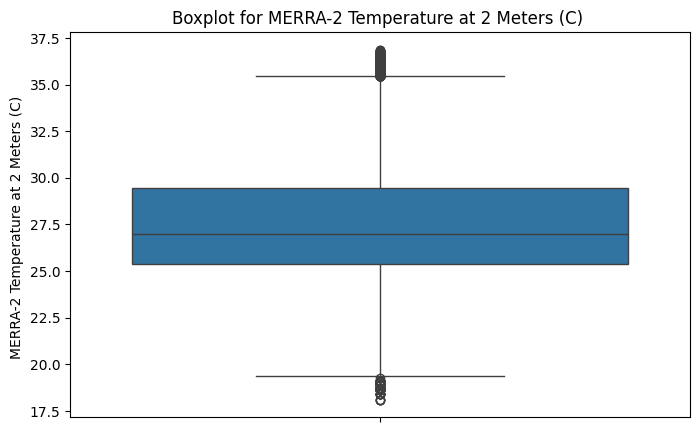

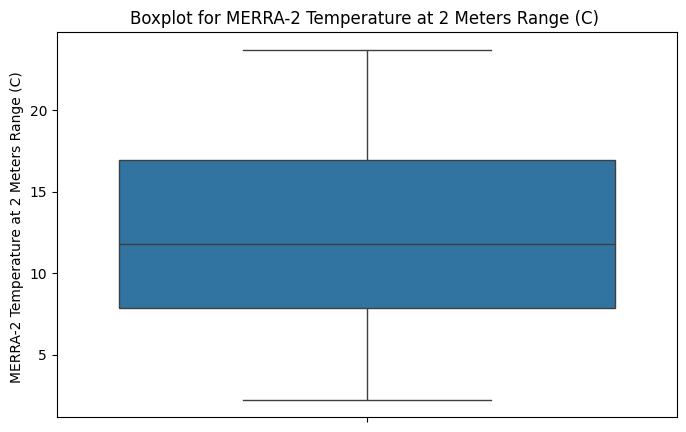

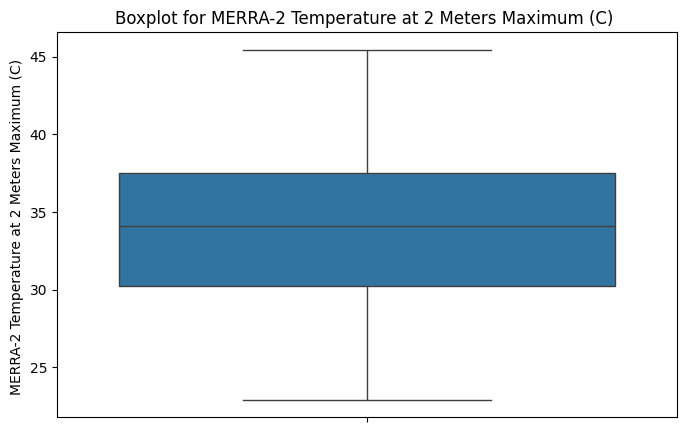

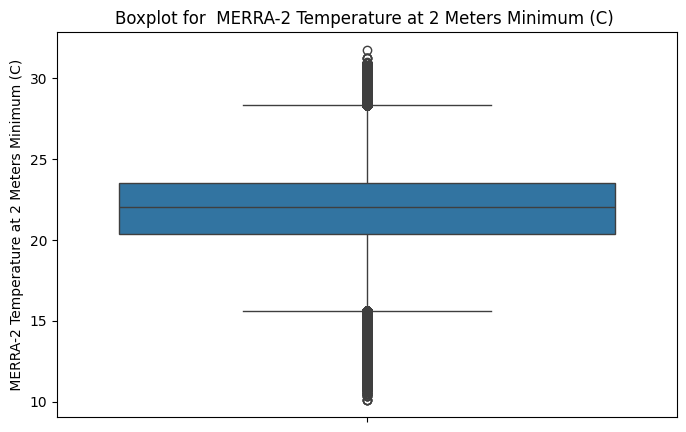

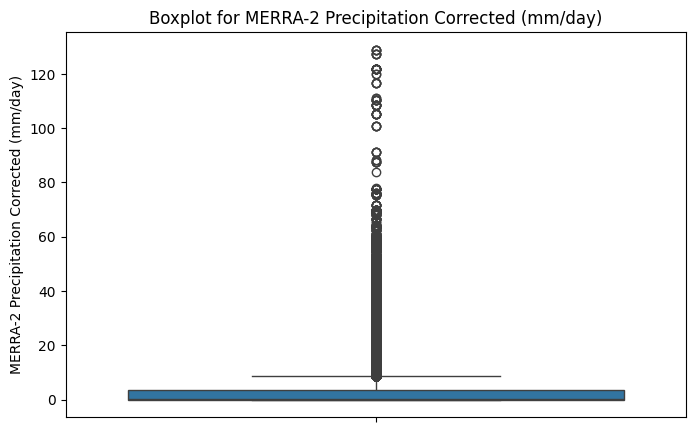

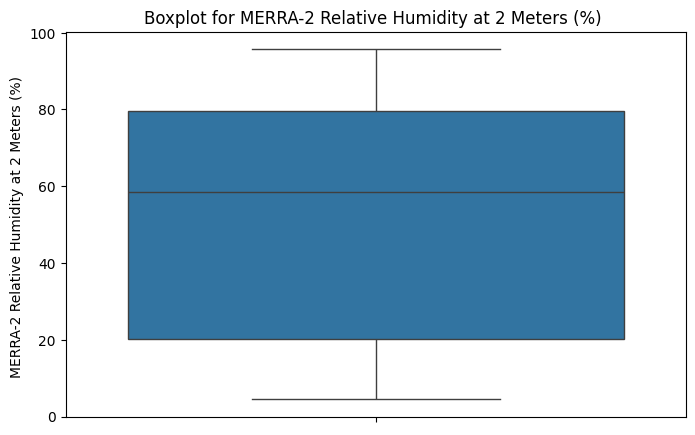

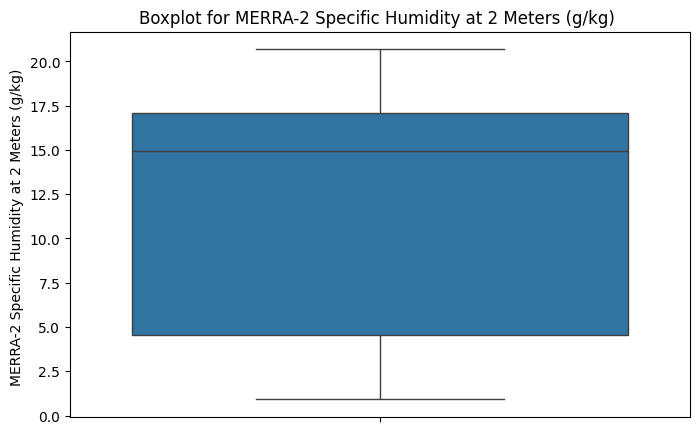

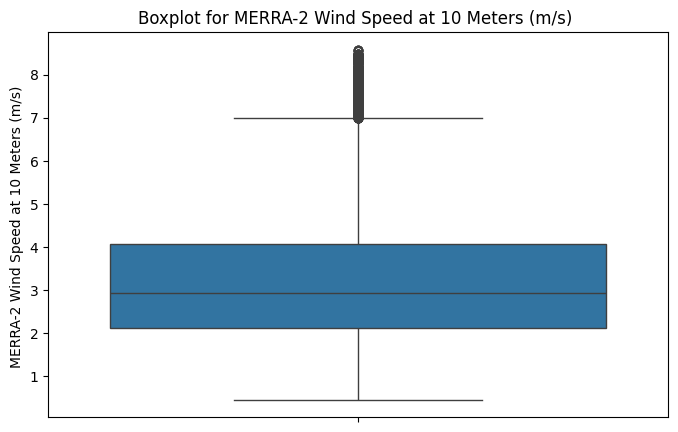

In [119]:
# Outlier Detection
# Check for outliers using boxplots
features = ['MERRA-2 Temperature at 2 Meters (C) ', 'MERRA-2 Temperature at 2 Meters Range (C) ',
              'MERRA-2 Temperature at 2 Meters Maximum (C) ',' MERRA-2 Temperature at 2 Meters Minimum (C) ',
              'MERRA-2 Precipitation Corrected (mm/day)','MERRA-2 Relative Humidity at 2 Meters (%) ',
              'MERRA-2 Specific Humidity at 2 Meters (g/kg) ','MERRA-2 Wind Speed at 10 Meters (m/s) ']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[feature])
    plt.title(f"Boxplot for {feature}")
    plt.show()

In [120]:
# Replace Outlier with Median
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[feature].median()
    df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound), median_value, df[feature])

In [121]:
# Feature Engineering
# Introduce Wet and Dry Season
# Assuming wet season is from May to October and dry season is from November to April
df['SEASON'] = df['MONTH'].apply(lambda x: 'Wet' if 5 <= x <= 10 else 'Dry')

#### Exploratory Data Analysis

In [122]:
# Summary statistics
display(df.describe())

,YEAR,MONTH,DAY,MERRA-2 Temperature at 2 Meters (C),MERRA-2 Temperature at 2 Meters Range (C),MERRA-2 Temperature at 2 Meters Maximum (C),MERRA-2 Temperature at 2 Meters Minimum (C),MERRA-2 Precipitation Corrected (mm/day),MERRA-2 Relative Humidity at 2 Meters (%),MERRA-2 Specific Humidity at 2 Meters (g/kg),MERRA-2 Wind Speed at 10 Meters (m/s),Latitude
count,409761.000000,409761.000000,409761.000000,409761.000000,409761.000000,409761.000000,409761.000000,409761.000000,409761.000000,409761.000000,409761.000000,409761.000000
mean,2006.498349,6.522671,15.727873,27.530964,12.238492,34.057690,21.966578,1.359898,51.977170,11.664213,3.160947,9.728042
std,9.809604,3.448446,8.799164,2.826899,4.733129,4.394055,2.518927,2.134430,28.779846,6.062936,1.313639,0.221986
min,1990.000000,1.000000,1.000000,19.370000,2.240000,22.910000,15.610000,0.000000,4.440000,0.920000,0.460000,9.406000
25%,1998.000000,4.000000,8.000000,25.400000,7.870000,30.200000,20.650000,0.000000,20.060000,4.520000,2.120000,9.514300
50%,2006.000000,7.000000,16.000000,26.970000,11.810000,34.070000,22.060000,0.230000,58.560000,14.950000,2.930000,9.649700
75%,2015.000000,10.000000,23.000000,29.400000,16.920000,37.510000,23.490000,2.130000,79.690000,17.090000,4.040000,9.936600
max,2023.000000,12.000000,31.000000,35.470000,23.720000,45.460000,28.320000,8.670000,95.620000,20.690000,6.990000,10.169000


##### Temperature Trend

In [123]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'MERRA-2 Temperature at 2 Meters (C) ',
       'MERRA-2 Temperature at 2 Meters Range (C) ',
       'MERRA-2 Temperature at 2 Meters Maximum (C) ',
       ' MERRA-2 Temperature at 2 Meters Minimum (C) ',
       'MERRA-2 Precipitation Corrected (mm/day)',
       'MERRA-2 Relative Humidity at 2 Meters (%) ',
       'MERRA-2 Specific Humidity at 2 Meters (g/kg) ',
       'MERRA-2 Wind Speed at 10 Meters (m/s) ', 'Latitude', 'Longitude',
       'SEASON'],
      dtype='object')

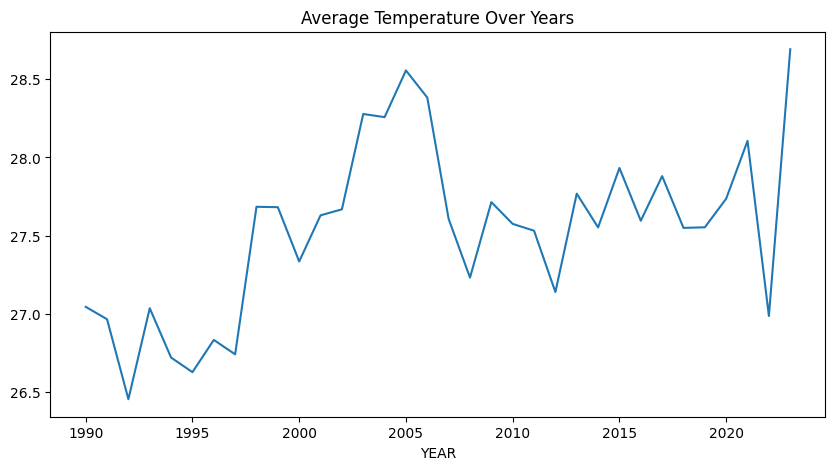

In [124]:
# temperature trend over the years
df.groupby("YEAR")['MERRA-2 Temperature at 2 Meters (C) '].mean().plot(
    kind='line', figsize=(10,5), title='Average Temperature Over Years'
)
plt.show()

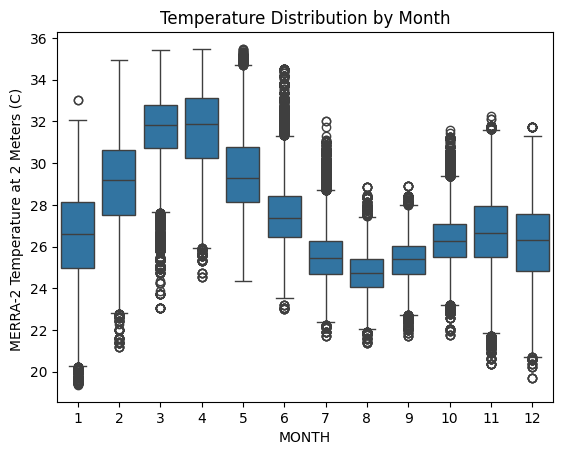

In [125]:
# Seasonal Analysis
sns.boxplot(x=df['MONTH'], y=df['MERRA-2 Temperature at 2 Meters (C) '])
plt.title("Temperature Distribution by Month")
plt.show()

##### Precipitation Patterns

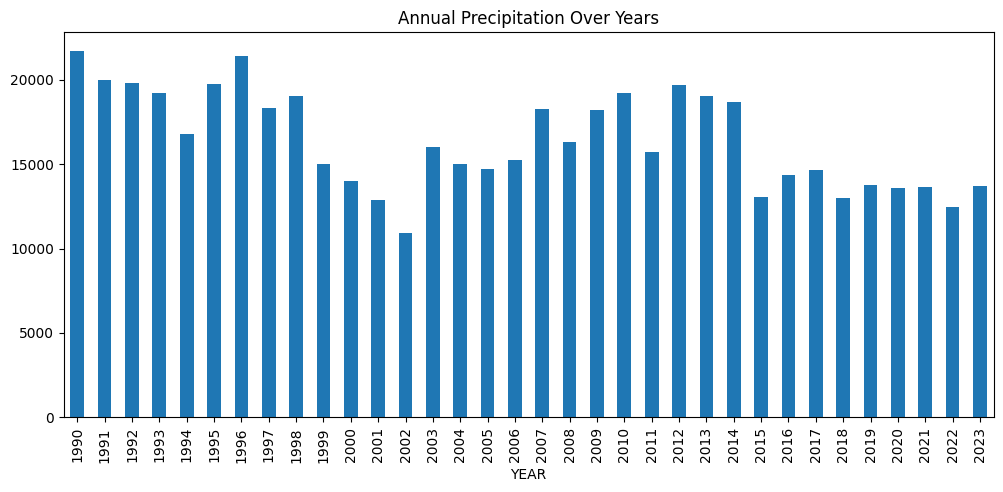

In [126]:
# Precipitation trends
df.groupby("YEAR")['MERRA-2 Precipitation Corrected (mm/day)'].sum().plot(
    kind='bar', figsize=(12,5), title='Annual Precipitation Over Years'
)
plt.show()

##### Wind Speed and Humidity

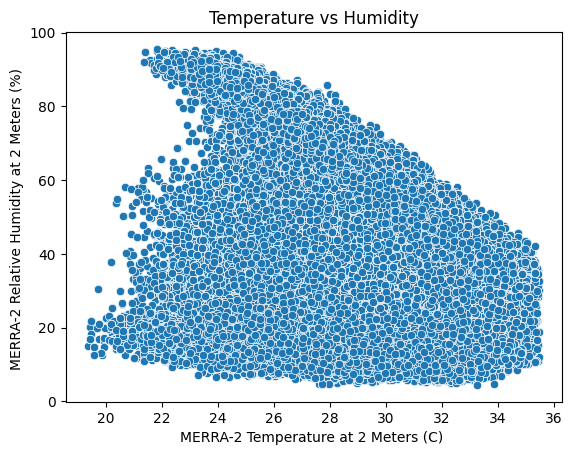

In [127]:
# Humidity vs Temperature
sns.scatterplot(x=df['MERRA-2 Temperature at 2 Meters (C) '], y=df['MERRA-2 Relative Humidity at 2 Meters (%) '])
plt.title("Temperature vs Humidity")
plt.show()

#### Feature Correlation

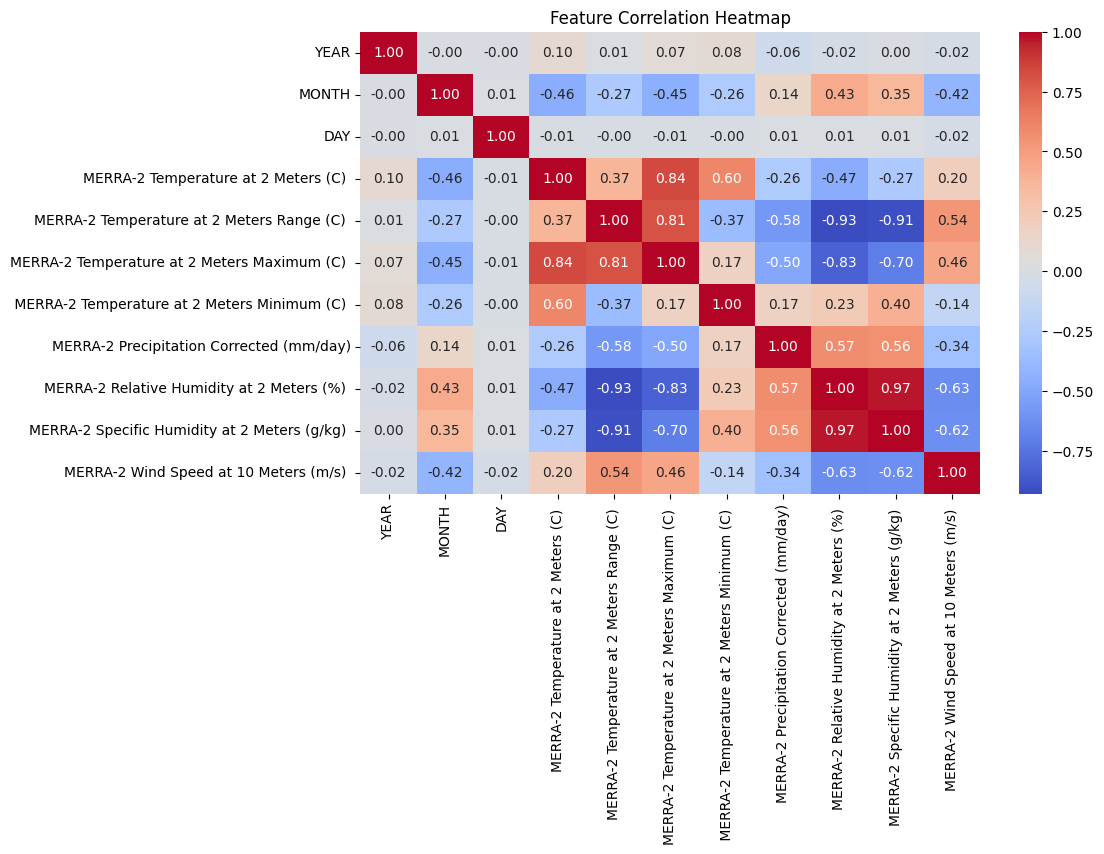

In [128]:
# Correlation Heatmap
dfc = df.drop(['Latitude', 'Longitude', 'SEASON'], axis=1)
plt.figure(figsize=(10,6))
sns.heatmap(dfc.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#### Analysis based on wet and dry season

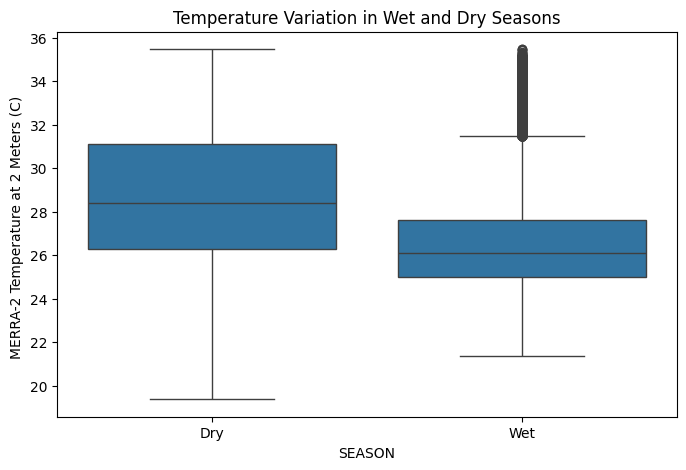

In [129]:
# Wet vs Dry Season Analysis
plt.figure(figsize=(8,5))
sns.boxplot(x=df['SEASON'], y=df['MERRA-2 Temperature at 2 Meters (C) '])
plt.title("Temperature Variation in Wet and Dry Seasons")
plt.show()

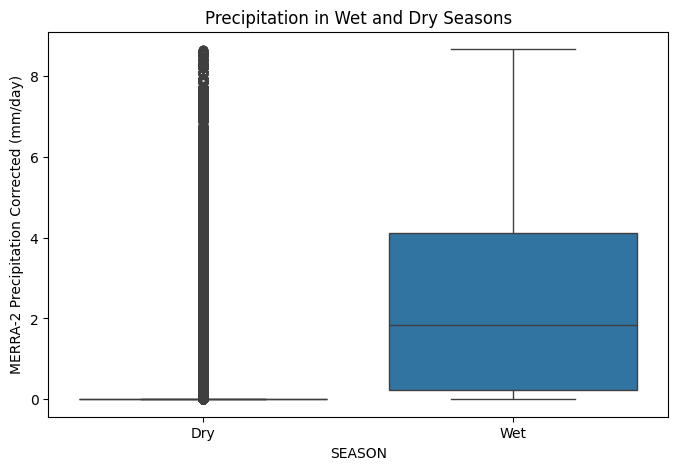

In [130]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['SEASON'], y=df['MERRA-2 Precipitation Corrected (mm/day)'])
plt.title("Precipitation in Wet and Dry Seasons")
plt.show()

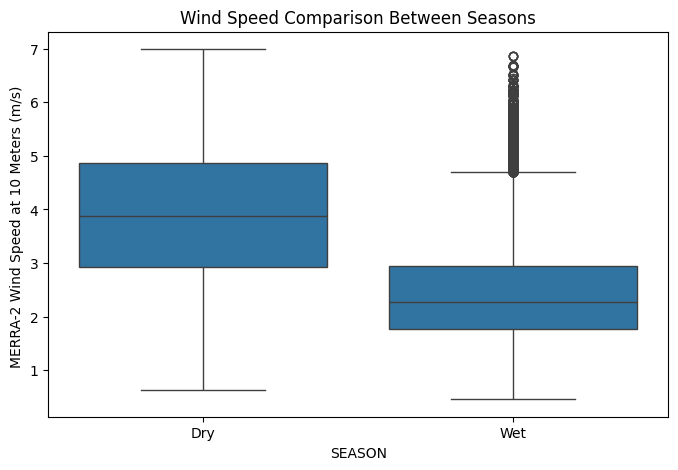

In [131]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['SEASON'], y=df['MERRA-2 Wind Speed at 10 Meters (m/s) '])
plt.title("Wind Speed Comparison Between Seasons")
plt.show()

### Forecast - Temperature, Precipitation, Humidity

In [132]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [133]:
df.head(2)

,YEAR,MONTH,DAY,MERRA-2 Temperature at 2 Meters (C),MERRA-2 Temperature at 2 Meters Range (C),MERRA-2 Temperature at 2 Meters Maximum (C),MERRA-2 Temperature at 2 Meters Minimum (C),MERRA-2 Precipitation Corrected (mm/day),MERRA-2 Relative Humidity at 2 Meters (%),MERRA-2 Specific Humidity at 2 Meters (g/kg),MERRA-2 Wind Speed at 10 Meters (m/s),Latitude,Longitude,SEASON
0,1990,1,1,27.65,17.71,37.23,19.51,0.0,19.00,4.03,2.42,9.406,13.462,Dry
1,1990,1,2,27.87,17.19,37.21,20.01,0.0,19.12,3.91,1.84,9.406,13.462,Dry


In [134]:
# create the temperature forecasting dataset
#df["date"] = df["YEAR"]+"-"+df["MONTH"]+"-"+df["DAY"]
dft = df.copy()
dft["ds"] = pd.to_datetime(df["YEAR"], format='ISO8601') # 
dft["y"] = df["MERRA-2 Temperature at 2 Meters (C) "] # 
dft = dft[["ds", "y"]]

In [135]:
# display the first five rows, general information, and check for duplicates
display(dft.head(), dft.info(), dft.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409761 entries, 0 to 409760
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      409761 non-null  datetime64[ns]
 1   y       409761 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 MB


,ds,y
0,1990-01-01,27.65
1,1990-01-01,27.87
2,1990-01-01,27.79
3,1990-01-01,26.89
4,1990-01-01,27.76


None

np.int64(379701)

In [136]:
# drop duplicates
dft.drop_duplicates(inplace=True)

In [137]:
# check for duplicates, missing values, and general information
display(dft.duplicated().sum(), dft.isnull().sum(), dft.info())

<class 'pandas.core.frame.DataFrame'>
Index: 30060 entries, 0 to 310421
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      30060 non-null  datetime64[ns]
 1   y       30060 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.5 KB


np.int64(0)

ds    0
y     0
dtype: int64

None

In [138]:
# initiate the prophet method as an object
model = Prophet()

In [140]:
# fit the model
model.fit(df)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
future = model.make_future_dataframe(periods=5)  # Predict for the next 5 years
forecast = model.predict(future)

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))